In [1]:
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d
import pyvista as pv
import csv

In [3]:
import pyvista as pv
from itkwidgets import view

points = np.loadtxt('bunny.pts', skiprows=1)

cloud = pv.PolyData(points)
mesh = cloud.reconstruct_surface()

# Crea un oggetto Plotter
plotter = pv.Plotter()

# Aggiungi la mesh alla visualizzazione
plotter.add_mesh(mesh)

# Mostra la visualizzazione interattiva utilizzando itkwidgets
view(plotter,rotate = 'True')


# Mostra la visualizzazione
plotter.show()

Widget(value="<iframe src='http://localhost:57593/index.html?ui=P_0x7f7a05c43640_1&reconnect=auto' style='widt…

In [40]:
points = np.loadtxt('sphere_normals.txt', skiprows=1)


#cloud = pv.PolyData(points)
#cloud.point_normals

ValueError: could not convert string '-0.850614,-0.52579,-2.96823e-06,-10.6331,-6.57164,4.02397e-16' to float64 at row 0, column 1.

In [12]:
def compute_point_normals(points):
    # Crea una mesh PolyData con i punti
    cloud = pv.PolyData(points)
    
    # Calcola le normali dei punti
    cloud.compute_normals(cell_normals=False, point_normals=True, inplace=True)
    
    # Restituisci le normali dei punti
    return cloud.point_normals

# Esempio di utilizzo

point_cloud = np.loadtxt('bunny.pts', skiprows=1)



normals = compute_point_normals(point_cloud)

KeyError: 'Normals'

/Applications/anaconda3/envs/my-env/lib/python3.9/site-packages/pyvista/jupyter/notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


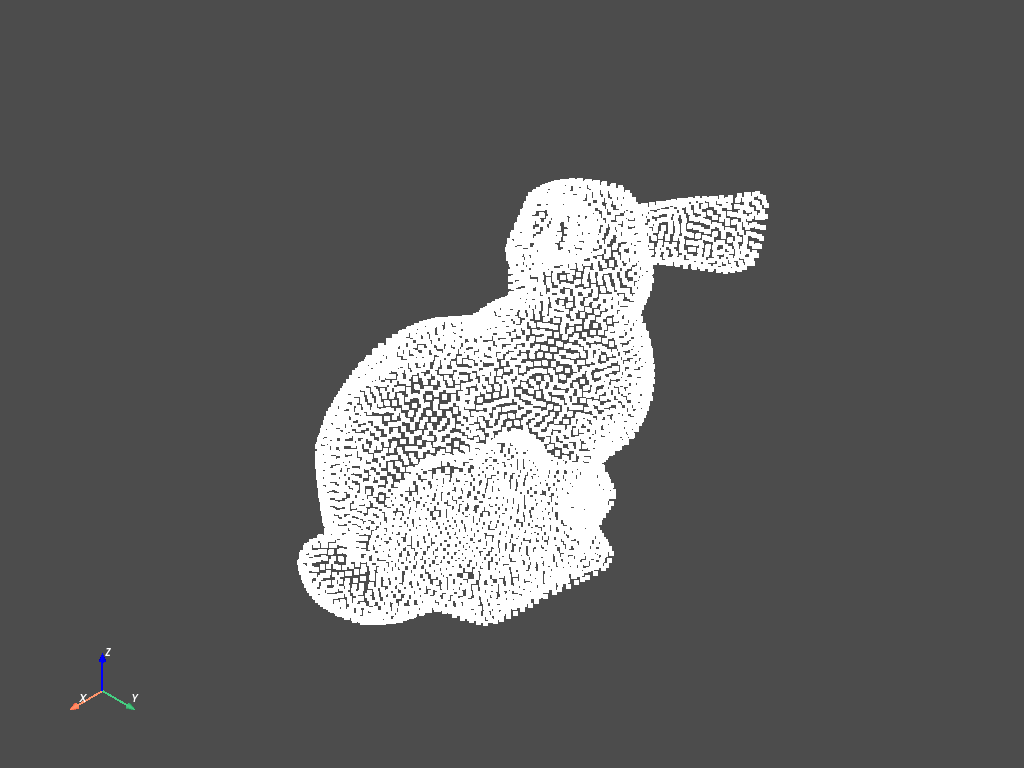

In [6]:
point_cloud = pv.read('bunny.pts')
point_cloud.plot()

In [2]:
#point_cloud = np.loadtxt('sample_w_normals.xyz',skiprows=1)           # with normals
#point_cloud = np.loadtxt('the_researcher_desk.xyz', skiprows=1)        # not available normals -> doesn't work

In [36]:
point_cloud=points

In [39]:
point_cloud.shape

(6302,)

In [37]:
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(point_cloud[:,:3])
pcd.colors = o3d.utility.Vector3dVector(point_cloud[:,3:6]/255)
pcd.normals = o3d.utility.Vector3dVector(point_cloud[:,6:9])

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [4]:
# for visualization
o3d.visualization.draw_geometries([pcd])

: 

### strategy 1: Ball Pivoting Algorithm

In [4]:
distances = pcd.compute_nearest_neighbor_distance()
avg_dist = np.mean(distances)
radius = 3 * avg_dist

In [5]:
bpa_mesh = o3d.geometry.TriangleMesh.create_from_point_cloud_ball_pivoting(pcd,o3d.utility.DoubleVector([radius, radius * 2]))

In [6]:
dec_mesh = bpa_mesh.simplify_quadric_decimation(100000)

In [7]:
dec_mesh.remove_degenerate_triangles()
dec_mesh.remove_duplicated_triangles()
dec_mesh.remove_duplicated_vertices()
dec_mesh.remove_non_manifold_edges()

TriangleMesh with 87724 points and 99983 triangles.

In [8]:
o3d.io.write_triangle_mesh("bpa_mesh.ply", dec_mesh)

True

In [9]:
def lod_mesh_export(mesh, lods, extension):
    mesh_lods={}
    for i in lods:
        mesh_lod = mesh.simplify_quadric_decimation(i)
        o3d.io.write_triangle_mesh("bpa_lod_"+str(i)+extension, mesh_lod)
        mesh_lods[i]=mesh_lod
    print("generation of "+str(i)+" LoD successful")
    return mesh_lods

In [13]:
my_lods = lod_mesh_export(bpa_mesh, [100000,50000,10000,1000,100], ".ply")

generation of 100 LoD successful


In [1]:
o3d.visualization.draw_geometries([my_lods[50000]])

NameError: name 'o3d' is not defined

### strategy 2: poisson reconstruction

In [5]:
poisson_mesh = o3d.geometry.TriangleMesh.create_from_point_cloud_poisson(pcd, depth=8, width=0, scale=1.1, linear_fit=False)[0]

In [6]:
bbox = pcd.get_axis_aligned_bounding_box()
p_mesh_crop = poisson_mesh.crop(bbox)

In [7]:
o3d.io.write_triangle_mesh("p_mesh_c.ply", p_mesh_crop)

True

In [8]:
def lod_mesh_export_pois(mesh, lods, extension):
    mesh_lods={}
    for i in lods:
        mesh_lod = mesh.simplify_quadric_decimation(i)
        o3d.io.write_triangle_mesh("pois_lod_"+str(i)+extension, mesh_lod)
        mesh_lods[i]=mesh_lod
    print("generation of "+str(i)+" LoD successful")
    return mesh_lods

In [9]:
my_lods = lod_mesh_export_pois(p_mesh_crop, [100000,50000,10000,1000,100], ".ply")


generation of 100 LoD successful


In [ ]:
o3d.visualization.draw_geometries([my_lods[1000]])

### strategy 3: library pyVista

https://medium.com/mlearning-ai/point-clouds-to-3d-meshes-in-python-d90c8e53fe96

You just need to provide a NumPy array with a shape of N × 3 where N is the number of points and the three columns are the x position, y position, and z position of each point. 

In [19]:
import pyvista as pv

In [20]:
# NumPy array with shape (n_points, 3)
#points = np.genfromtxt('the_researcher_desk.xyz', dtype=np.float32)[:,:3]
points = np.genfromtxt('file.xyz', dtype=np.float32, skip_header=2)[:,:3]
#points = np.genfromtxt('bunny.pts', dtype=np.float32, skip_header=2)[:,:3]

point_cloud = pv.PolyData(points)
mesh = point_cloud.reconstruct_surface()
mesh.save('mesh.stl')

In [21]:
points.shape

(6501, 3)

In [ ]:
#ok array (N x 3)

/Applications/anaconda3/envs/my-env/lib/python3.9/site-packages/pyvista/jupyter/notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


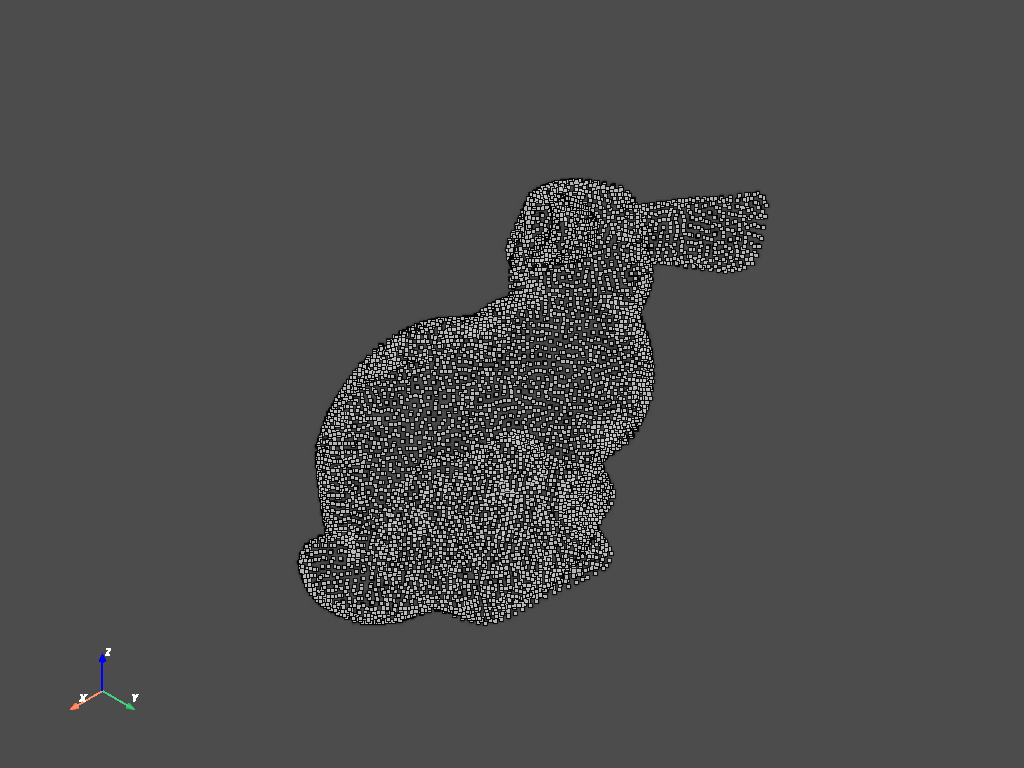

In [22]:
point_cloud.plot(eye_dome_lighting=True)

/Applications/anaconda3/envs/my-env/lib/python3.9/site-packages/pyvista/jupyter/notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


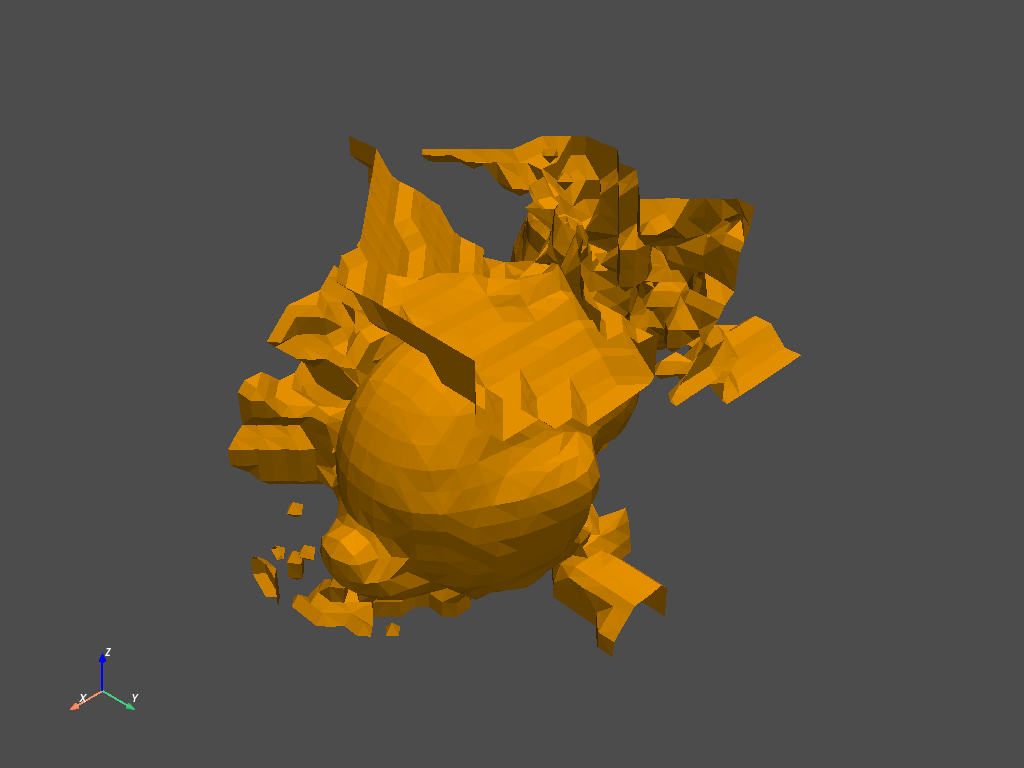

In [23]:
mesh.plot(color='orange')

In [ ]:
# non bene la mesh per il tavolo :(
# ok la mesh per la sfera, e non servono le normali :)

In [ ]:
# versione alternativa ma simile
# You need however to manually play with the alpha parameter that controls the distance under which two points are linked.

In [ ]:
import numpy as np
import pyvista as pv

# points is a 3D numpy array (n_points, 3) coordinates of a sphere
cloud = pv.PolyData(points)
cloud.plot()

volume = cloud.delaunay_3d(alpha=2.)
shell = volume.extract_geometry()
shell.plot()

### strategy 4: using MeshLab

http://fabacademy.org/2018/docs/FabAcademy-Tutorials/week5_3dscanning_and_printing/point_cloud_mesh.html

https://blogs.gre.ac.uk/designsupport/3d-realisation/laser-scanning/meshlab-point-cloud-to-mesh/

In [3]:
# created: table_meshlab.ply

TypeError: draw_geometries(): incompatible function arguments. The following argument types are supported:
    1. (geometry_list: List[open3d.cpu.pybind.geometry.Geometry], window_name: str = 'Open3D', width: int = 1920, height: int = 1080, left: int = 50, top: int = 50, point_show_normal: bool = False, mesh_show_wireframe: bool = False, mesh_show_back_face: bool = False) -> None
    2. (geometry_list: List[open3d.cpu.pybind.geometry.Geometry], window_name: str = 'Open3D', width: int = 1920, height: int = 1080, left: int = 50, top: int = 50, point_show_normal: bool = False, mesh_show_wireframe: bool = False, mesh_show_back_face: bool = False, lookat: numpy.ndarray[numpy.float64[3, 1]], up: numpy.ndarray[numpy.float64[3, 1]], front: numpy.ndarray[numpy.float64[3, 1]], zoom: float) -> None

Invoked with: 'table_meshlab.ply'